# Importing all the necessary libraries for our analysis

In [1]:
import pandas as pd #Data Wrangling
import matplotlib.pyplot as plt #Visualisation
import numpy as np #Numpy
import seaborn as sns #Visualisaton
import pandas_profiling #Descriptive Analytics
%matplotlib inline

#Importing models for prediction and machine learning

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder

In [2]:
import warnings #To ignore the unnecessary warning notes.
warnings.filterwarnings('ignore')

# Reading the datasets and their descriptive analysis

In [3]:
Movies = pd.read_csv('movies.dat', sep='::', names = ['MovieID', 'Title', 'Genres'])

In [4]:
Movies.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
Movies.shape

(3883, 3)

In [6]:
Movies.describe()

,MovieID
count,3883.000000
mean,1986.049446
std,1146.778349
min,1.000000
25%,982.500000
50%,2010.000000
75%,2980.500000
max,3952.000000


In [7]:
Ratings = pd.read_csv('ratings.dat', sep='::', names = ['UserID', 'MovieID', 'Rating', 'Timestamp'])

In [8]:
Ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [9]:
Ratings.shape

(1000209, 4)

In [10]:
Ratings.describe()

,UserID,MovieID,Rating,Timestamp
count,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06
mean,3.024512e+03,1.865540e+03,3.581564e+00,9.722437e+08
std,1.728413e+03,1.096041e+03,1.117102e+00,1.215256e+07
min,1.000000e+00,1.000000e+00,1.000000e+00,9.567039e+08
25%,1.506000e+03,1.030000e+03,3.000000e+00,9.653026e+08
50%,3.070000e+03,1.835000e+03,4.000000e+00,9.730180e+08
75%,4.476000e+03,2.770000e+03,4.000000e+00,9.752209e+08
max,6.040000e+03,3.952000e+03,5.000000e+00,1.046455e+09


In [11]:
Users = pd.read_csv('users.dat', sep='::', names = ['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'])
Users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [12]:
Users.shape

(6040, 5)

In [13]:
Users.describe()

,UserID,Age,Occupation
count,6040.000000,6040.000000,6040.000000
mean,3020.500000,30.639238,8.146854
std,1743.742145,12.895962,6.329511
min,1.000000,1.000000,0.000000
25%,1510.750000,25.000000,3.000000
50%,3020.500000,25.000000,7.000000
75%,4530.250000,35.000000,14.000000
max,6040.000000,56.000000,20.000000


## Creating Master_Data as per the first requirement of the analysis

In [14]:
RatingsUsers = Ratings.merge(Users, on = 'UserID')
RatingsUsers.head()

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,1193,5,978300760,F,1,10,48067
1,1,661,3,978302109,F,1,10,48067
2,1,914,3,978301968,F,1,10,48067
3,1,3408,4,978300275,F,1,10,48067
4,1,2355,5,978824291,F,1,10,48067


In [15]:
RatingsUsersMovies = RatingsUsers.merge(Movies, on = 'MovieID')
RatingsUsersMovies.head()

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama


In [16]:
RatingsUsersMovies.to_csv('Master_Data.csv', index = False)

In [17]:
RatingsUsersMovies.drop(['Timestamp', 'Zip-code'], axis=1, inplace=True)

In [18]:
RatingsUsersMovies.columns

Index(['UserID', 'MovieID', 'Rating', 'Gender', 'Age', 'Occupation', 'Title',
       'Genres'],
      dtype='object')

In [19]:
Master_Data = RatingsUsersMovies
Master_Data.head()

,UserID,MovieID,Rating,Gender,Age,Occupation,Title,Genres
0,1,1193,5,F,1,10,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,M,56,16,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,M,25,12,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,M,25,7,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,M,50,1,One Flew Over the Cuckoo's Nest (1975),Drama


In [20]:
Master_Data.isnull().sum()

UserID        0
MovieID       0
Rating        0
Gender        0
Age           0
Occupation    0
Title         0
Genres        0
dtype: int64

In [21]:
Master_Data.shape, Ratings.shape, Users.shape, Movies.shape

((1000209, 8), (1000209, 4), (6040, 5), (3883, 3))

## Descriptive analysis of Master_Data using PandasProfiling

In [22]:
pandas_profiling.ProfileReport(Master_Data)

Number of variables,8
Number of observations,1000209
Total Missing (%),0.0%
Total size in memory,68.7 MiB
Average record size in memory,72.0 B
Numeric,5
Categorical,3
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [23]:
pfr = pandas_profiling.ProfileReport(Master_Data)
pfr.to_file('Descriptive_Analysis_Master_Data.html')

# Exploratory Data Analysis

## Exploring the datasets using visual representations (graphs or tables) and their findings

<function matplotlib.pyplot.show(*args, **kw)>

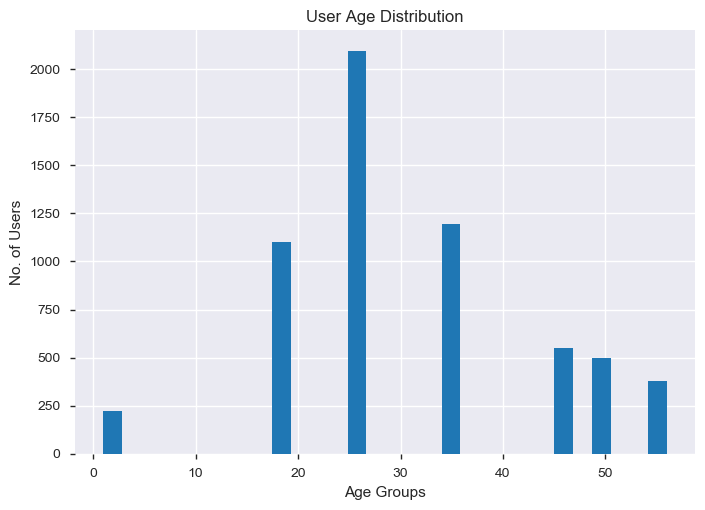

In [24]:
#User age distribution

Users['Age'].hist(bins=30)
plt.xlabel('Age Groups')
plt.ylabel('No. of Users')
plt.title('User Age Distribution')
plt.show

### Findings 1: Above graph shows that the highest number of users belongs to 25 yrs. old group interval

In [25]:
#User rating of the movie “Toy Story”

Toy_Story_1995 = Master_Data[Master_Data.MovieID==1]
Toy_Story_1995.head(10)

,UserID,MovieID,Rating,Gender,Age,Occupation,Title,Genres
41626,1,1,5,F,1,10,Toy Story (1995),Animation|Children's|Comedy
41627,6,1,4,F,50,9,Toy Story (1995),Animation|Children's|Comedy
41628,8,1,4,M,25,12,Toy Story (1995),Animation|Children's|Comedy
41629,9,1,5,M,25,17,Toy Story (1995),Animation|Children's|Comedy
41630,10,1,5,F,35,1,Toy Story (1995),Animation|Children's|Comedy
41631,18,1,4,F,18,3,Toy Story (1995),Animation|Children's|Comedy
41632,19,1,5,M,1,10,Toy Story (1995),Animation|Children's|Comedy
41633,21,1,3,M,18,16,Toy Story (1995),Animation|Children's|Comedy
41634,23,1,4,M,35,0,Toy Story (1995),Animation|Children's|Comedy
41635,26,1,3,M,25,7,Toy Story (1995),Animation|Children's|Comedy


In [26]:
Toy_Story_1995.groupby('Rating').size()

Rating
1     16
2     61
3    345
4    835
5    820
dtype: int64

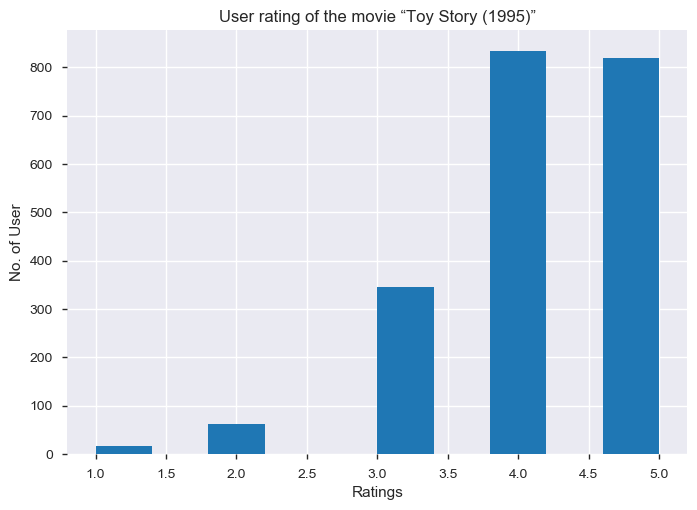

In [27]:
plt.hist(x = Toy_Story_1995['Rating'])
plt.xlabel("Ratings")
plt.ylabel("No. of User")
plt.title("User rating of the movie “Toy Story (1995)”")
plt.show()

### Findings 2: From above histogram, we found that "Toy Story (1995)" had been rated mostly with 4 out of 5 stars.

In [28]:
#Top 25 movies by viewership rating

Avg_Ratings = Master_Data.groupby(['Title'], as_index=False)
Avg_Movie_Ratings = Avg_Ratings.agg({'Rating':'mean'})
Top_25_Movies = Avg_Movie_Ratings.sort_values('Rating', ascending=False)
Top_25_Movies.head(26)

,Title,Rating
3477,Ulysses (Ulisse) (1954),5.000000
2025,Lured (1947),5.000000
1203,Follow the Bitch (1998),5.000000
407,Bittersweet Motel (2000),5.000000
3087,Song of Freedom (1936),5.000000
2453,One Little Indian (1973),5.000000
3044,Smashing Time (1967),5.000000
2903,Schlafes Bruder (Brother of Sleep) (1995),5.000000
1297,"Gate of Heavenly Peace, The (1995)",5.000000
249,"Baby, The (1973)",5.000000


### Findings 3: From above list, we find that all the top 25 movies had recieved minimum average rating of 4.5 stars. In fact Top 10 movies were having exact 5 out of 5 ratings.

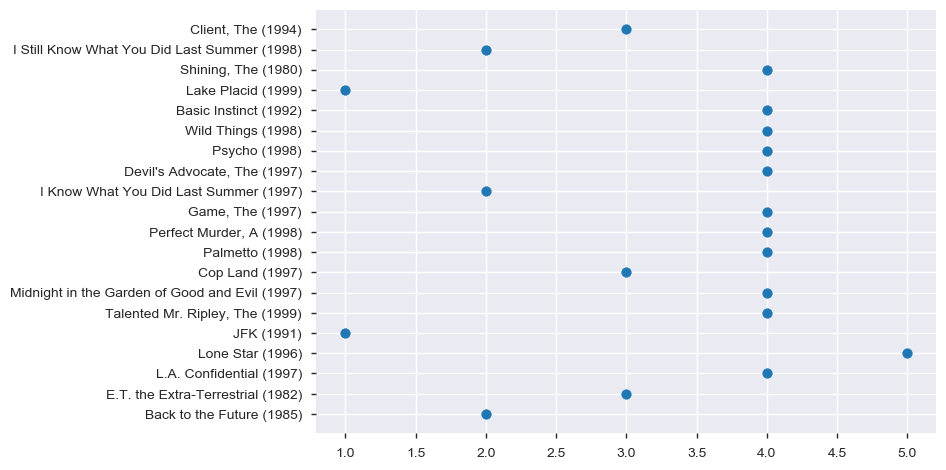

In [29]:
#Ratings for all the movies reviewed by for a particular user of user id = 2696

UserID_2696 = Master_Data[Master_Data['UserID']==2696]
UserID_2696
plt.scatter(y=UserID_2696.Title, x=UserID_2696.Rating)

### Findings 4: UserID = 2696, has data for 20 movies which s/he has seen all before year 2000 and he has rated most of the movies with 4 stars as depicted from the above scatter plot.

# Feature Engineering

In [30]:
Master_Data.dropna(inplace = True)

In [31]:
#All the unique genres

Master_Data["Genres"]= Master_Data["Genres"].str.split("|", n = -1, expand = True)
Master_Data.head()

,UserID,MovieID,Rating,Gender,Age,Occupation,Title,Genres
0,1,1193,5,F,1,10,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,M,56,16,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,M,25,12,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,M,25,7,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,M,50,1,One Flew Over the Cuckoo's Nest (1975),Drama


In [32]:
Master_Data.Genres.unique()

array(['Drama', 'Animation', 'Musical', 'Action', 'Comedy', 'Adventure',
       'Romance', "Children's", 'Thriller', 'Crime', 'Western',
       'Documentary', 'Mystery', 'Horror', 'Sci-Fi', 'Film-Noir', 'War',
       'Fantasy'], dtype=object)

## One-hot encoding for Genres

In [33]:
#One-hot encoding for genres

pd.get_dummies(Master_Data['Genres']).head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [34]:
SampleMasterData = Master_Data.head(200000)
SampleMasterData.shape

(200000, 8)

In [35]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

LE.fit(SampleMasterData['Age'])
x_Age = LE.transform(SampleMasterData['Age'])
x_Age

array([0, 6, 2, ..., 2, 2, 3], dtype=int64)

In [36]:
LE.fit(SampleMasterData['Occupation'])
x_Occ = LE.transform(SampleMasterData['Occupation'])
x_Occ

array([10, 16, 12, ...,  7,  4,  9], dtype=int64)

In [37]:
LE.fit(SampleMasterData['MovieID'])
x_MovieID = LE.transform(SampleMasterData['MovieID'])
x_MovieID

array([63, 63, 63, ..., 80, 80, 80], dtype=int64)

In [38]:
SampleMasterData['New_Age'] = x_Age
SampleMasterData['New_Occupation'] = x_Occ
SampleMasterData['New_MovieID'] = x_MovieID

In [39]:
# Feature Selection
x = SampleMasterData[['Age','Occupation','MovieID']]
y = SampleMasterData['Rating']
x.head()

,Age,Occupation,MovieID
0,1,10,1193
1,56,16,1193
2,25,12,1193
3,25,7,1193
4,50,1,1193


In [40]:
# Split-out validation dataset

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=40)

In [41]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((160000, 3), (40000, 3), (160000,), (40000,))

In [42]:
# performing preprocessing part 
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
  
x_train = sc.fit_transform(x_train) 
x_test = sc.transform(x_test)

In [43]:
# Applying PCA function on training 
# and testing set of X component 
from sklearn.decomposition import PCA 
  
pca = PCA(n_components = 2) 
  
x_train = pca.fit_transform(x_train) 
x_test = pca.transform(x_test) 
  
explained_variance = pca.explained_variance_ratio_

In [44]:
pca.explained_variance_ratio_

array([0.36236092, 0.33290935])

## Developing an appropriate model to predict the movie ratings

In [45]:
from sklearn.linear_model import LogisticRegression
logitReg = LogisticRegression()
lm = logitReg.fit(x_train, y_train)

In [46]:
Result = logitReg.predict(x_test)

In [47]:
Estimated = pd.Series(Result, name='Estimated Values')

In [48]:
Final_Result = pd.concat([y_test, Estimated], axis=1)

In [49]:
# Test options and evaluation metric
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print (accuracy_score(y_test, Result))
print (confusion_matrix(y_test, Result))
print (classification_report(y_test, Result))

0.3729
[[    0     0     0   963    37]
 [    0     0     0  2476   107]
 [    0     0     0  8165   285]
 [    0     0     0 14534   460]
 [    0     0     0 12591   382]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      2583
           3       0.00      0.00      0.00      8450
           4       0.38      0.97      0.54     14994
           5       0.30      0.03      0.05     12973

    accuracy                           0.37     40000
   macro avg       0.14      0.20      0.12     40000
weighted avg       0.24      0.37      0.22     40000



### From above matrix we can see we have achieved  37% accuracy.

In [50]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [51]:
# Spot-Check Algorithms
seed = 6
models = []
models.append(('LR', LogisticRegression()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('LDA', LinearDiscriminantAnalysis()))

In [52]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.372694 (0.003088)
DTC: 0.396213 (0.003989)
GNB: 0.373562 (0.002602)
KNN: 0.360300 (0.004842)
LDA: 0.372519 (0.003015)


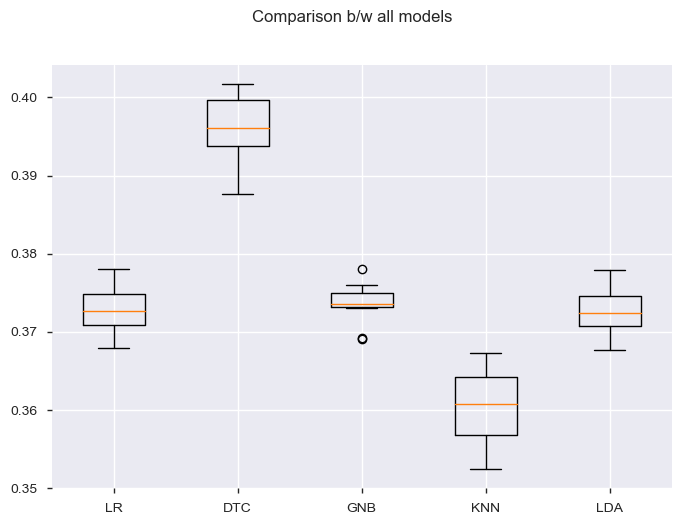

In [53]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Comparison b/w all models')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### From above chart, we see Decision Tree Classifier gives more accurate results among others followed by Gaussian Naive Bayes.